In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import time
import pickle
import gc
import sklearn
import ast
import umap
import plotly.express as px
import plotly.io as pio
import tensorflow as tf
import numpy as np
import time
from scipy.spatial.distance import pdist, squareform
from scipy.spatial import KDTree
pio.renderers.default = "iframe"

# DType warning when importing .csv files with parsed PMIDs. Avoid showing the warning
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [14]:
sortedDFs_output = input().strip()

 E:\sciAbstractsProject_sortedDFs\


In [15]:
# Extract and add names of files in directories containing .csv files to a list, keep only .csv files
sorted_DFs = []
for root, dirs, files in os.walk(sortedDFs_output):
        for file in files:
            if file[-4:] == ".csv":
                sorted_DFs.append(os.path.join(root, file))

In [16]:
df = pd.read_csv(sorted_DFs[0])
df = df[["PMID", "Title", "Abstract"]]

In [2]:
df_nomic_embed_text_v2_moe = pd.read_csv(r"C:\Users\svalb\Downloads\output_prueba_embeddings_nomic-embed-text-v2-moe.csv")

In [3]:
df_nomic_embed_text_v2_moe["AbstractEmbedding_list"] = df_nomic_embed_text_v2_moe["AbstractEmbedding"].apply(ast.literal_eval)

In [4]:
colnames_nomic_embed_text_v2_moe = []
for el in range(768):
    colnames_nomic_embed_text_v2_moe.append("Embedding_"+str(el))

In [5]:
df_nomic_embed_text_v2_moe[colnames_nomic_embed_text_v2_moe] = df_nomic_embed_text_v2_moe["AbstractEmbedding_list"].to_list()

C:\Users\svalb\AppData\Local\Temp\ipykernel_12876\1112894936.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\svalb\AppData\Local\Temp\ipykernel_12876\1112894936.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\svalb\AppData\Local\Temp\ipykernel_12876\1112894936.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

In [6]:
mapper_nomic_embed_text_v2_moe = umap.UMAP().fit_transform(df_nomic_embed_text_v2_moe[colnames_nomic_embed_text_v2_moe])

C:\Users\svalb\anaconda3\envs\env_sci-abstract-graphs\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [7]:
mapper_nomic_embed_text_v2_moe[:, 1] = -1*mapper_nomic_embed_text_v2_moe[:, 1] 

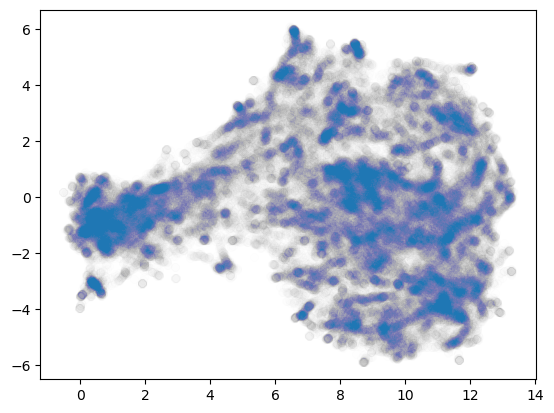

In [8]:
plt.scatter(x = mapper_nomic_embed_text_v2_moe[:, 0], y = mapper_nomic_embed_text_v2_moe[:, 1], alpha = 0.002)
plt.show()

In [9]:
df_nomic_embed_text_v2_moe["UMAP1"] = mapper_nomic_embed_text_v2_moe[:, 0]
df_nomic_embed_text_v2_moe["UMAP2"] = mapper_nomic_embed_text_v2_moe[:, 1]

C:\Users\svalb\AppData\Local\Temp\ipykernel_12876\3885543997.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\svalb\AppData\Local\Temp\ipykernel_12876\3885543997.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [18]:
df_UMAP_nomic_embed_text_v2_moe = df_nomic_embed_text_v2_moe[["PMID", "UMAP1", "UMAP2"]]
df_UMAP_nomic_embed_text_v2_moe["Title"] = df["Title"]

In [19]:
fig = px.line(df_UMAP_nomic_embed_text_v2_moe, x="UMAP1", y="UMAP2", hover_data = ["Title", "PMID"])
fig.update_traces(mode="markers")
fig.show()

In [24]:
df_for_dist = df_nomic_embed_text_v2_moe[colnames_nomic_embed_text_v2_moe]

In [25]:
distances = pdist(df_for_dist.values, metric='euclidean')

In [28]:
distance_matrix = squareform(distances)

MemoryError: Unable to allocate 74.5 GiB for an array with shape (100000, 100000) and data type float64

In [ ]:
df_to_save = pd.DataFrame(distance_matrix)
df_to_save.to_csv(r"C:\Users\svalb\Downloads\output_distance_matrix_100k.csv")

In [30]:
len(distances)

4999950000

In [32]:
distances_KDTree = KDTree(df_for_dist.values)

In [ ]:
query_distances = distances_KDTree.query(df_for_dist.values[0], k=1)